In [1]:
!pip install pandas_profiling
!pip install sweetviz

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv

# EDA

In [3]:
clean = pd.read_csv("/data_clean.csv")

In [4]:
clean.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
type(clean)  # to check the data structure

pandas.core.frame.DataFrame

In [6]:
clean.shape   # r,c

(158, 10)

In [7]:
clean.dtypes  # object means mix data

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [8]:
clean.info() #check not null as per total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [9]:
clean2=clean.iloc[:,1:]  # to remove column 1 -Data Clean
clean2.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S
157,18.0,131.0,8.0,76,9,29,2010,76,C


In [10]:
#The method df.copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
dclean=clean2.copy()
dclean.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


## Conversion of dtypes

In [11]:
#treating columns where python assigned "object" dtype due to ambiguity in data
# coerce will introduce NA values for non numeric data in the columns
dclean['Month']=pd.to_numeric(dclean['Month'],errors='coerce')
dclean['Temp C']=pd.to_numeric(dclean['Temp C'],errors='coerce')
dclean['Weather']=dclean['Weather'].astype('category')           #dclean['Wind']=dclean['Wind'].astype('int64')

In [12]:
dclean.Month.values

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., nan,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  5.,  9.,  9.,
        9.,  9.])

In [13]:
dclean["Weather"].values

['S', 'C', 'PS', 'S', 'S', ..., 'C', 'PS', 'S', 'S', 'C']
Length: 158
Categories (3, object): ['C', 'PS', 'S']

In [14]:
dclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


## Duplicates

In [15]:
# will return bool which one is duplicated
dclean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [16]:
#Count of duplicated rows
dclean[dclean.duplicated()].shape

(1, 9)

In [17]:
#Print the duplicated rows
dclean[dclean.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [18]:
#Drop duplicate rows
dc1=dclean.drop_duplicates()

In [19]:
#verified that the row has been deleted
dc1.shape

(157, 9)

## Drop columns

In [20]:
dc2=dc1.drop('Temp C',axis=1)
dc2.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


## Rename the columns

In [21]:
#rename the Solar column
dc3= dc2.rename({'Solar.R': 'Solar'}, axis=1)
dc3.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


## Outlier Detection

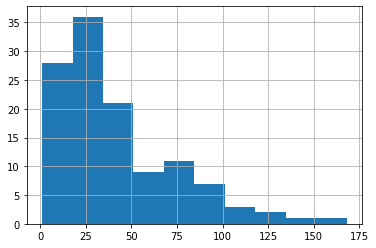

In [22]:
# histogram of Ozone
dc3['Ozone'].hist();

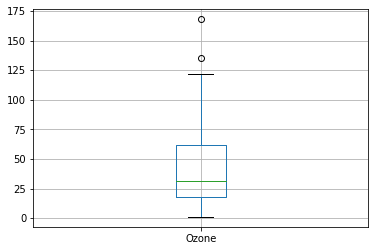

In [23]:
#Box plot
dc3.boxplot(column=['Ozone']);

In [24]:
#Descriptive stat
dc3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

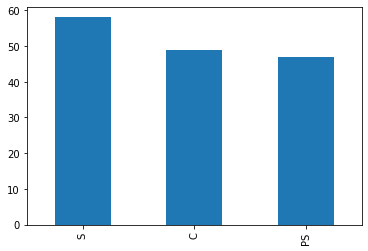

In [25]:
#Bar plot
dc3['Weather'].value_counts().plot.bar();

## Missing Values and Imputation

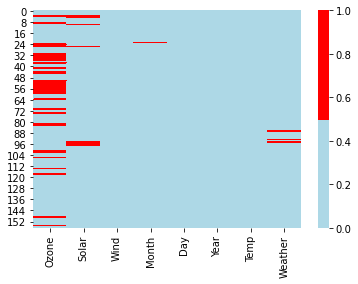

In [26]:
cols = dc3.columns 
colours = ['lightblue', 'red'] # specify the colours - red is missing. blue is not missing.
sns.heatmap(dc3[cols].isnull(),cmap=sns.color_palette(colours));

In [27]:
dc3[dc3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [28]:
dc3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [29]:
#Mean Imputation ->replacing NA in numeric values with mean of the data
mean = dc3['Ozone'].mean()
print(mean)

41.81512605042017


In [30]:
dc3['Ozone'] = dc3['Ozone'].fillna(mean)
dc3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [31]:
mean1=dc3['Solar'].mean()
dc3['Solar']=dc3['Solar'].fillna(mean1)
dc3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [32]:
mean2=dc3['Month'].mean()
dc3['Month']=dc3['Month'].fillna(mean2)
dc3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [33]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=dc3[['Weather']]

In [34]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [35]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [36]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [37]:
dc3.shape

(157, 8)

In [38]:
obj_columns.shape

(157, 1)

In [39]:
dc3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [40]:
# drop the weather colm(with NA) in order to append the imputed weather colm to original data frame
# check if data frame has been dropped
dc4=dc3.iloc[:,:7]
dc4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,41.000000,190.000000,7.4,5.0,1,2010,67
1,36.000000,118.000000,8.0,5.0,2,2010,72
2,12.000000,149.000000,12.6,5.0,3,2010,74
3,18.000000,313.000000,11.5,5.0,4,2010,62
4,41.815126,185.366667,14.3,5.0,5,2010,56


In [41]:
#append the data set with no NA and replaced modal colm
dc4=pd.concat([dc4,obj_columns],axis=1)
dc4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [42]:
dc4.shape

(157, 8)

In [43]:
dc4.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

## Scatter plot and Correlation analysis

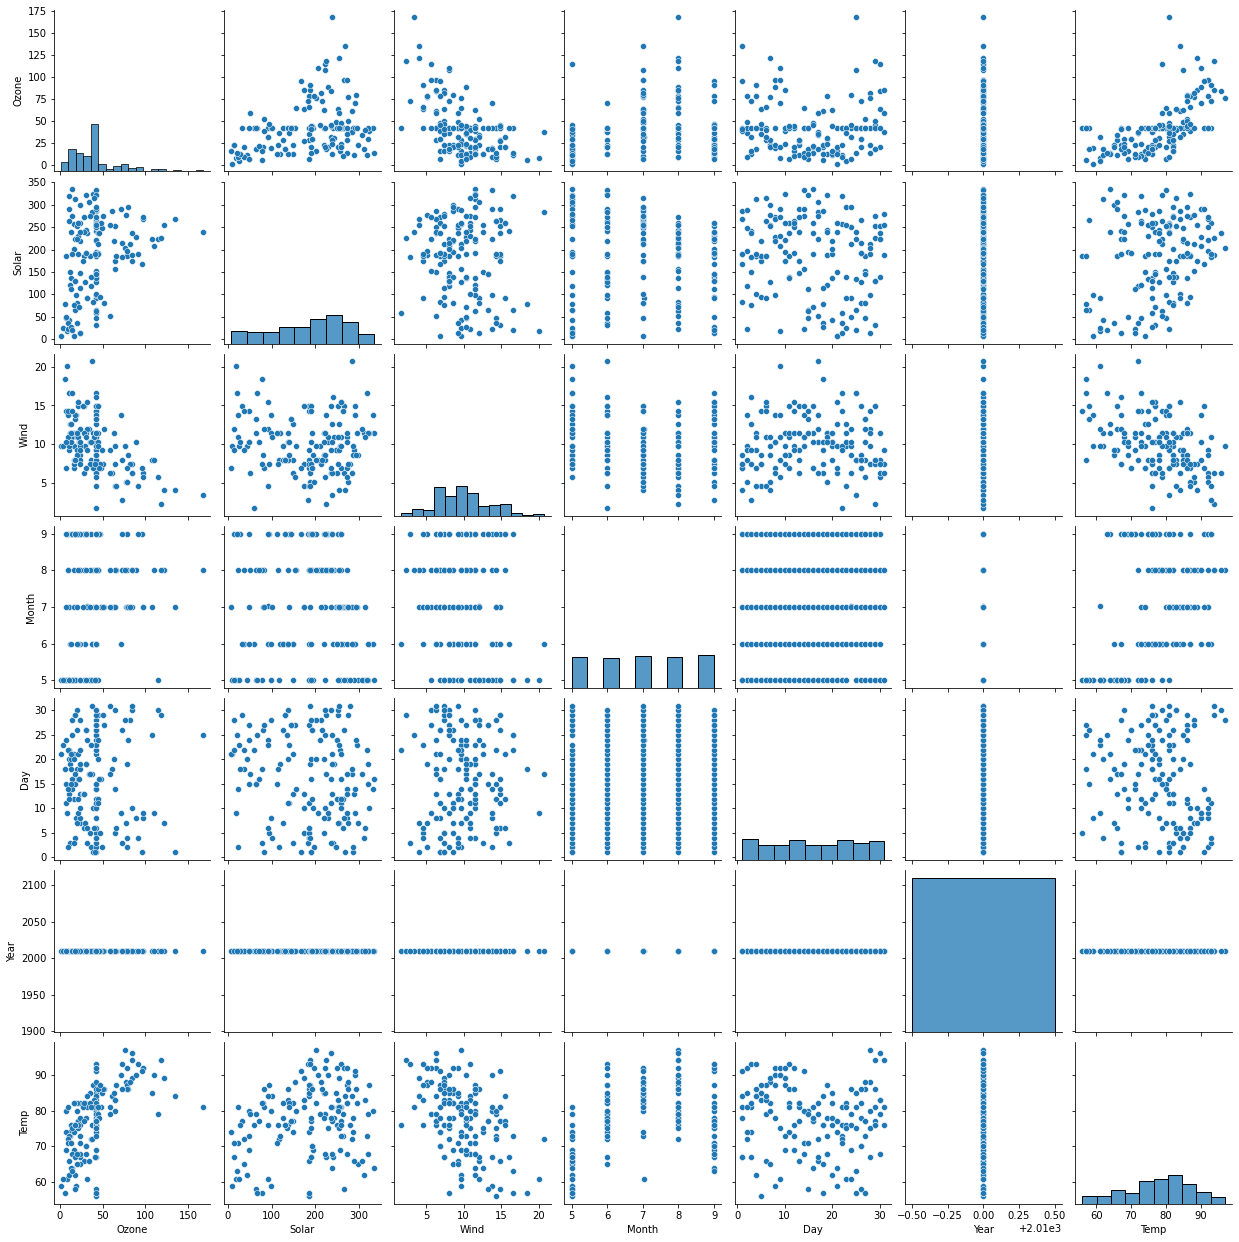

In [44]:
# Create the default pairplot
sns.pairplot(dc3);

In [45]:
#Correlation
dc3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132809,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090564,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166029,0.029900,NaN,-0.441228
Month,0.132809,-0.090564,-0.166029,1.000000,0.049924,NaN,0.394420
Day,-0.021916,-0.151007,0.029900,0.049924,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.394420,-0.122787,NaN,1.000000


## Transformations

### Dummy Variable

In [46]:
#Creating dummy variable for Weather column(1 hot encoding)
dc4=pd.get_dummies(dclean,columns=['Weather'])
dc4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [47]:
dc4=dc4.dropna()

### Normalization of the data

In [48]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [49]:
dc4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [50]:
array = dc3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2) # precision is no. of decimal value
print(rescaledX[0:5,:])


[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]]


## Standardize data (Z-Score)

In [51]:
# (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [52]:
array = dc4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


## Speed up the EDA process (Auto EDA)

In [58]:
EDA_report= pp.ProfileReport(dclean)
EDA_report.to_file(output_file='ppedareport.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
sweet_report = sv.analyze(dclean)
sweet_report.show_html('svedareport.html')

                                             |                                             | [  0%]   00:00 ->…

Report 6.svedareport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
#will be saved in your default directory or location